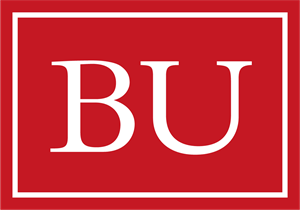

#**Final Project: Step III: Classification**

---

<h2>AD699 A3 Data Mining (Spring 2024)</div>

<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


### Data Cleaning & Import

In [2]:
library(tidyverse)
# don't show scientific notation
options(scipen = 999)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
#read data
zurich <- read_csv("zurich_listings_699.csv")

Rows: 2534 Columns: 75
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (30): listing_url, last_scraped, source, name, description, neighborhood...
dbl (37): id, scrape_id, host_id, host_listings_count, host_total_listings_c...
lgl  (8): host_is_superhost, host_has_profile_pic, host_identity_verified, b...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [74]:
install.packages("naniar")
library(naniar)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [98]:
# remove cols with no value at all
zurich1 <- zurich[,-c(7,36,38,50,69)]
colSums(is.na(zurich1))


test_cases <- complete.cases(zurich1)
l <- sum(test_cases)
percentage <- (l/nrow(zurich1))*100
cat("percentage  and l", percentage, l)
library(naniar)
missing_var <- miss_var_summary(zurich1)
print(missing_var)


# Review_score_value converted to factor and new variable is Review_value
zurich1$review_scores_value[is.na(zurich1$review_scores_value)] <- 0
summary(zurich1$review_scores_value)
bins= c(-Inf,0,4,5)
zurich1$review_value <- cut(zurich1$review_scores_value, breaks= bins, labels= c("No Reviews", "Poor Reviews","Good Reviews" ))
table(zurich1$review_value)

# Review_score_rating converted to factor and new variable is Review_rating
zurich1$review_scores_rating[is.na(zurich1$review_scores_rating)] <- 0
summary(zurich1$review_scores_rating)
bins= c(-Inf,0,4,5)
zurich1$review_rating <- cut(zurich1$review_scores_rating, breaks= bins, labels= c("No Reviews", "Poor Reviews","Good Reviews" ))
table(zurich1$review_rating)

# Review_score_rating converted to factor and new variable is Review_rating
zurich1$review_scores_accuracy[is.na(zurich1$review_scores_accuracy)] <- 0
summary(zurich1$review_scores_accuracy)
bins= c(-Inf,0,4,5)
zurich1$review_accuracy <- cut(zurich1$review_scores_accuracy, breaks= bins, labels= c("No Reviews", "Poor Reviews","Good Reviews" ))
table(zurich1$review_accuracy)

# Review_score_cleanliness  converted to factor and new variable is Review_cleanliness
zurich1$review_scores_cleanliness [is.na(zurich1$review_scores_cleanliness )] <- 0
summary(zurich1$review_scores_cleanliness )
bins= c(-Inf,0,4,5)
zurich1$review_cleanliness  <- cut(zurich1$review_scores_cleanliness , breaks= bins, labels= c("No Reviews", "Poor Reviews","Good Reviews" ))
table(zurich1$review_cleanliness )

# Review_score_checkin  converted to factor and new variable is Review_checkin
zurich1$review_scores_checkin [is.na(zurich1$review_scores_checkin )] <- 0
summary(zurich1$review_scores_checkin )
bins= c(-Inf,0,4,5)
zurich1$review_checkin  <- cut(zurich1$review_scores_checkin , breaks= bins, labels= c("No Reviews", "Poor Reviews","Good Reviews" ))
table(zurich1$review_checkin )

# Review_score_communication  converted to factor and new variable is Review_communication
zurich1$review_scores_communication [is.na(zurich1$review_scores_communication )] <- 0
summary(zurich1$review_scores_communication )
bins= c(-Inf,0,4,5)
zurich1$review_communication  <- cut(zurich1$review_scores_communication , breaks= bins, labels= c("No Reviews", "Poor Reviews","Good Reviews" ))
table(zurich1$review_communication )

# Review_score_location   converted to factor and new variable is Review_location
zurich1$review_scores_location  [is.na(zurich1$review_scores_location  )] <- 0
summary(zurich1$review_scores_location  )
bins= c(-Inf,0,4,5)
zurich1$review_location   <- cut(zurich1$review_scores_location  , breaks= bins, labels= c("No Reviews", "Poor Reviews","Good Reviews" ))
table(zurich1$review_location  )

# Removing redundant review scores

zurich1 <- zurich1[,-c(58,59,60,61,62,63,64)]
dim(zurich1)

# EXTRACTING PRICE & BATHS
zurich2 <- zurich1 %>%
  mutate(NumPrice=as.numeric(gsub("[$,]","",zurich1$price))) %>%
  mutate(baths=case_when(
    grepl("(half).*",  zurich1$bathrooms_text, ignore.case = TRUE) ~0.5,
    TRUE ~ as.numeric(gsub("[^0-9.]+","",zurich1$bathrooms_text))
  ))
head(zurich2$NumPrice)
colSums(is.na(zurich2))
zurich2$baths <- ifelse(is.na(zurich2$baths), 1,zurich2$baths) # imputing the last na value


#***To me removed later***
# Imputing missing price values
u_room_type<- unique(zurich2$room_type)
u_property_type <- unique(zurich2$property_type)
print(u_room_type)
print(u_property_type)

#***To me removed later***
test_u_property_type <- zurich2 %>% filter(property_type=="Casa particular")
test_u_room_type <- zurich2 %>% filter(room_type=="Hotel room")
test_u_beds <- unique(zurich2$beds)
table(test_u_beds)
summary(test_u_beds)
c<- mode(test_u_beds)
print(c)

#Imputing missing values in 'beds'
zurich2$beds <- ifelse(is.na(zurich2$beds) & zurich2$room_type == "Shared room", zurich2$accommodates,
                       ifelse(is.na(zurich2$beds) & zurich2$room_type %in% c("Private room", "Entire home/apt") & zurich2$accommodates %in% 1:2, 1,
                              ifelse(is.na(zurich2$beds) & zurich2$room_type %in% c("Private room", "Entire home/apt") & zurich2$accommodates %in% 3:8, ceiling(zurich2$accommodates/2),
                                     zurich2$beds)))

colSums(is.na(zurich2))

# Creating new variabales guests per bath and bed
zurich_FE <- zurich2 %>% mutate(guestsPerBath= zurich2$accommodates/zurich2$baths) %>% mutate(guestsPerBed = zurich2$accommodates/zurich2$beds)
head(zurich_FE,2)

#***REDUNDANT STEP, REMOVE LATER****
zurich2_price_nonas<- zurich2 %>% filter(!is.na(NumPrice))
zurich2_price_nas<- zurich2 %>% filter(is.na(NumPrice))
zurich2_beds_nonas <- zurich2 %>% filter(is.na(beds))
price_imputing_mlr_model <- lm(NumPrice~neighbourhood_cleansed + neighbourhood_group_cleansed  + room_type +accommodates+beds, zurich2_price_nonas)
step_mlr <- step(price_imputing_mlr_model,  method= "backward")
summary(price_imputing_mlr_model)
impute_price_preds <- predict(price_imputing_mlr_model,zurich2_price_nas)
View(impute_price_preds)

# Impute Price
zurich_test <- zurich_FE %>% group_by(neighbourhood_group_cleansed,neighbourhood_cleansed, property_type,room_type, beds) %>% arrange(neighbourhood_group_cleansed,neighbourhood_cleansed, property_type,room_type, beds)

zurich_imputed <- zurich_test %>% mutate(NumPrice= ifelse(is.na(NumPrice), mean(NumPrice, na.rm= TRUE), NumPrice))
colSums(is.na(zurich_imputed))
# Removing redundant price and bathrooms_text as new variales NumPrice and baths are created
zurich_imputed <- zurich_imputed[,-c(35,38)]



id 
                                           0 
                                 listing_url 
                                           0 
                                   scrape_id 
                                           0 
                                last_scraped 
                                           0 
                                      source 
                                           0 
                                        name 
                                           0 
                       neighborhood_overview 
                                        1334 
                                 picture_url 
                                           0 
                                     host_id 
                                           0 
                                    host_url 
                                           0 
                                   host_name 
                                           0 
                                  host_since 
                                           0 
                               host_location 
                                         442 
                                  host_about 
                                         992 
                          host_response_time 
                                           0 
                          host_response_rate 
                                           0 
                        host_acceptance_rate 
                                           0 
                           host_is_superhost 
                                          42 
                          host_thumbnail_url 
                                           0 
                            host_picture_url 
                                           0 
                          host_neighbourhood 
                                        2499 
                         host_listings_count 
                                           0 
                   host_total_listings_count 
                                           0 
                          host_verifications 
                                           0 
                        host_has_profile_pic 
                                           0 
                      host_identity_verified 
                                           0 
                               neighbourhood 
                                        1334 
                      neighbourhood_cleansed 
                                           0 
                neighbourhood_group_cleansed 
                                           0 
                                    latitude 
                                           0 
                                   longitude 
                                           0 
                               property_type 
                                           0 
                                   room_type 
                                           0 
                                accommodates 
                                           0 
                              bathrooms_text 
                                           2 
                                        beds 
                                          44 
                                   amenities 
                                           0 
                                       price 
                                           0 
                              minimum_nights 
                                           0 
                              maximum_nights 
                                           0 
                      minimum_minimum_nights 
                                           0 
                      maximum_minimum_nights 
                                           0 
                      minimum_maximum_nights 
                                           0 
                      maximum_maximum_nights 
                                        

percentage  and l 0.394633 10# A tibble: 70 × 3
   variable                    n_miss pct_miss
   <chr>                        <int>    <num>
 1 host_neighbourhood            2499     98.6
 2 neighborhood_overview         1334     52.6
 3 neighbourhood                 1334     52.6
 4 host_about                     992     39.1
 5 review_scores_accuracy         561     22.1
 6 review_scores_cleanliness      561     22.1
 7 review_scores_checkin          561     22.1
 8 review_scores_communication    561     22.1
 9 review_scores_location         561     22.1
10 review_scores_value            561     22.1
# ℹ 60 more rows


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.880   4.610   3.608   4.840   5.000 


  No Reviews Poor Reviews Good Reviews 
         561          157         1816 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.000   4.770   3.703   5.000   5.000 


  No Reviews Poor Reviews Good Reviews 
         561           98         1875 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.000   4.820   3.731   5.000   5.000 


  No Reviews Poor Reviews Good Reviews 
         561           91         1882 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.000   4.780   3.706   5.000   5.000 


  No Reviews Poor Reviews Good Reviews 
         561          104         1869 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.250   4.880   3.773   5.000   5.000 


  No Reviews Poor Reviews Good Reviews 
         561           56         1917 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.320   4.890   3.778   5.000   5.000 


  No Reviews Poor Reviews Good Reviews 
         561           55         1918 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.000   4.800   3.733   5.000   5.000 


  No Reviews Poor Reviews Good Reviews 
         561           79         1894 

[1] 2534   70

[1] 100  60 200  79 500 145

id 
                                           0 
                                 listing_url 
                                           0 
                                   scrape_id 
                                           0 
                                last_scraped 
                                           0 
                                      source 
                                           0 
                                        name 
                                           0 
                       neighborhood_overview 
                                        1334 
                                 picture_url 
                                           0 
                                     host_id 
                                           0 
                                    host_url 
                                           0 
                                   host_name 
                                           0 
                                  host_since 
                                           0 
                               host_location 
                                         442 
                                  host_about 
                                         992 
                          host_response_time 
                                           0 
                          host_response_rate 
                                           0 
                        host_acceptance_rate 
                                           0 
                           host_is_superhost 
                                          42 
                          host_thumbnail_url 
                                           0 
                            host_picture_url 
                                           0 
                          host_neighbourhood 
                                        2499 
                         host_listings_count 
                                           0 
                   host_total_listings_count 
                                           0 
                          host_verifications 
                                           0 
                        host_has_profile_pic 
                                           0 
                      host_identity_verified 
                                           0 
                               neighbourhood 
                                        1334 
                      neighbourhood_cleansed 
                                           0 
                neighbourhood_group_cleansed 
                                           0 
                                    latitude 
                                           0 
                                   longitude 
                                           0 
                               property_type 
                                           0 
                                   room_type 
                                           0 
                                accommodates 
                                           0 
                              bathrooms_text 
                                           2 
                                        beds 
                                          44 
                                   amenities 
                                           0 
                                       price 
                                           0 
                              minimum_nights 
                                           0 
                              maximum_nights 
                                           0 
                      minimum_minimum_nights 
                                           0 
                      maximum_minimum_nights 
                                           0 
                      minimum_maximum_nights 
                                           0 
                      maximum_maximum_nights 
                                        

[1] "Entire home/apt" "Private room"    "Hotel room"      "Shared room"    
 [1] "Entire rental unit"                 "Private room in rental unit"       
 [3] "Private room in home"               "Entire loft"                       
 [5] "Entire condo"                       "Entire home"                       
 [7] "Private room in castle"             "Private room in condo"             
 [9] "Private room in townhouse"          "Entire serviced apartment"         
[11] "Private room in hut"                "Private room in guesthouse"        
[13] "Private room in villa"              "Tiny home"                         
[15] "Room in boutique hotel"             "Private room in loft"              
[17] "Private room in bed and breakfast"  "Entire townhouse"                  
[19] "Entire guest suite"                 "Entire villa"                      
[21] "Shared room in hostel"              "Room in serviced apartment"        
[23] "Shared room in rental unit"         "Room in bed 

test_u_beds
 1  2  3  4  5  6  7  8  9 10 18 32 
 1  1  1  1  1  1  1  1  1  1  1  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    3.75    6.50    8.75    9.25   32.00       1 

[1] "numeric"


id 
                                           0 
                                 listing_url 
                                           0 
                                   scrape_id 
                                           0 
                                last_scraped 
                                           0 
                                      source 
                                           0 
                                        name 
                                           0 
                       neighborhood_overview 
                                        1334 
                                 picture_url 
                                           0 
                                     host_id 
                                           0 
                                    host_url 
                                           0 
                                   host_name 
                                           0 
                                  host_since 
                                           0 
                               host_location 
                                         442 
                                  host_about 
                                         992 
                          host_response_time 
                                           0 
                          host_response_rate 
                                           0 
                        host_acceptance_rate 
                                           0 
                           host_is_superhost 
                                          42 
                          host_thumbnail_url 
                                           0 
                            host_picture_url 
                                           0 
                          host_neighbourhood 
                                        2499 
                         host_listings_count 
                                           0 
                   host_total_listings_count 
                                           0 
                          host_verifications 
                                           0 
                        host_has_profile_pic 
                                           0 
                      host_identity_verified 
                                           0 
                               neighbourhood 
                                        1334 
                      neighbourhood_cleansed 
                                           0 
                neighbourhood_group_cleansed 
                                           0 
                                    latitude 
                                           0 
                                   longitude 
                                           0 
                               property_type 
                                           0 
                                   room_type 
                                           0 
                                accommodates 
                                           0 
                              bathrooms_text 
                                           2 
                                        beds 
                                           0 
                                   amenities 
                                           0 
                                       price 
                                           0 
                              minimum_nights 
                                           0 
                              maximum_nights 
                                           0 
                      minimum_minimum_nights 
                                           0 
                      maximum_minimum_nights 
                                           0 
                      minimum_maximum_nights 
                                           0 
                      maximum_maximum_nights 
                                        

id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,⋯,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location,NumPrice,baths,guestsPerBath,guestsPerBed
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
73282,https://www.airbnb.com/rooms/73282,20230900000000,9/24/2023,previous scrape,Rental unit in Zurich · ★4.78 · 1 bedroom · 1 bed · 1 bath,NA,https://a0.muscache.com/pictures/481072/abd94c69_original.jpg,377532,https://www.airbnb.com/users/show/377532,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,100,1,4,4
178448,https://www.airbnb.com/rooms/178448,20230900000000,9/24/2023,city scrape,Rental unit in Zurich · ★4.89 · 1 bedroom · 1 bed · 1 bath,"We live in one of the top locations of Zürich, the Hürrlimann Areal where the headquarter of Google Europe is located <br />Its a 5 Minutes walk to Bahnhof Enge, 10 Minutes walk to the Bahnhofstrasse, 10 minutes to the lakeside.",https://a0.muscache.com/pictures/7d41e016-e818-4fe1-9d42-a5d0ae34bdda.jpg,854016,https://www.airbnb.com/users/show/854016,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,60,1,1,1


Start:  AIC=28114.3
NumPrice ~ neighbourhood_cleansed + neighbourhood_group_cleansed + 
    room_type + accommodates + beds


Step:  AIC=28114.3
NumPrice ~ neighbourhood_cleansed + room_type + accommodates + 
    beds

                         Df Sum of Sq       RSS   AIC
- beds                    1     41110 161797520 28113
- room_type               3    302524 162058934 28113
<none>                                161756410 28114
- accommodates            1   4646657 166403067 28184
- neighbourhood_cleansed 33   9303394 171059804 28190

Step:  AIC=28112.94
NumPrice ~ neighbourhood_cleansed + room_type + accommodates

                         Df Sum of Sq       RSS   AIC
- room_type               3    312579 162110098 28112
<none>                                161797520 28113
- neighbourhood_cleansed 33   9275001 171072521 28188
- accommodates            1   9253726 171051245 28252

Step:  AIC=28111.83
NumPrice ~ neighbourhood_cleansed + accommodates

                         Df Sum o


Call:
lm(formula = NumPrice ~ neighbourhood_cleansed + neighbourhood_group_cleansed + 
    room_type + accommodates + beds, data = zurich2_price_nonas)

Residuals:
   Min     1Q Median     3Q    Max 
-573.7  -72.6  -23.9   21.6 9674.8 

Coefficients: (11 not defined because of singularities)
                                           Estimate Std. Error t value
(Intercept)                                   5.653     35.765   0.158
neighbourhood_cleansedAlbisrieden            90.285     49.571   1.821
neighbourhood_cleansedAlt-Wiedikon           30.911     40.893   0.756
neighbourhood_cleansedAltstetten            126.216     39.393   3.204
neighbourhood_cleansedCity                  427.997     84.644   5.056
neighbourhood_cleansedEnge                  131.810     43.137   3.056
neighbourhood_cleansedEscher Wyss            60.251     49.134   1.226
neighbourhood_cleansedFluntern               50.544     53.600   0.943
neighbourhood_cleansedFriesenberg            51.972     50.166   1.

numeric(0)

id 
                                           0 
                                 listing_url 
                                           0 
                                   scrape_id 
                                           0 
                                last_scraped 
                                           0 
                                      source 
                                           0 
                                        name 
                                           0 
                       neighborhood_overview 
                                        1334 
                                 picture_url 
                                           0 
                                     host_id 
                                           0 
                                    host_url 
                                           0 
                                   host_name 
                                           0 
                                  host_since 
                                           0 
                               host_location 
                                         442 
                                  host_about 
                                         992 
                          host_response_time 
                                           0 
                          host_response_rate 
                                           0 
                        host_acceptance_rate 
                                           0 
                           host_is_superhost 
                                          42 
                          host_thumbnail_url 
                                           0 
                            host_picture_url 
                                           0 
                          host_neighbourhood 
                                        2499 
                         host_listings_count 
                                           0 
                   host_total_listings_count 
                                           0 
                          host_verifications 
                                           0 
                        host_has_profile_pic 
                                           0 
                      host_identity_verified 
                                           0 
                               neighbourhood 
                                        1334 
                      neighbourhood_cleansed 
                                           0 
                neighbourhood_group_cleansed 
                                           0 
                                    latitude 
                                           0 
                                   longitude 
                                           0 
                               property_type 
                                           0 
                                   room_type 
                                           0 
                                accommodates 
                                           0 
                              bathrooms_text 
                                           2 
                                        beds 
                                           0 
                                   amenities 
                                           0 
                                       price 
                                           0 
                              minimum_nights 
                                           0 
                              maximum_nights 
                                           0 
                      minimum_minimum_nights 
                                           0 
                      maximum_minimum_nights 
                                           0 
                      minimum_maximum_nights 
                                           0 
                      maximum_maximum_nights 
                                        

In [99]:
head(zurich_imputed)

id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,⋯,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location,NumPrice,baths,guestsPerBath,guestsPerBed
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
49201447,https://www.airbnb.com/rooms/49201447,20230900000000,9/24/2023,city scrape,Loft in Zürich · ★5.0 · 1 bedroom · 1 bed · 1 bath,"The loft is next to the luxury shopping street Bahnhofstrasse, the lake and beaches, top restaurants and bars, few minutes walking distance to all central cultural sightseeings, the old city, churches, museums etc. The only place with no street or tram in front of the Appartment overlooking the river and a beautiful marina with access to sunbathing platform and swimming / pure vacation feeling! Summer and winter! Restaurant with bio and organic fresh juices and food, coffee place, as well as gym in main floor or the same building.",https://a0.muscache.com/pictures/miso/Hosting-49201447/original/e4e62822-c482-4e39-9e48-e081bd2bb35f.jpeg,12630015,https://www.airbnb.com/users/show/12630015,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,407,1,2,2
50101353,https://www.airbnb.com/rooms/50101353,20230900000000,9/24/2023,previous scrape,Loft in Zürich · ★5.0 · 2 bedrooms · 2 beds · 2 baths,"Very central location, minutes from Bahnhofstrasse shopping areas, many bars and restaurants. A 5minute walk to the lake",https://a0.muscache.com/pictures/5a6bfcae-c409-4c78-a8c2-be4c03b9fa05.jpg,13470694,https://www.airbnb.com/users/show/13470694,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,480,2,2,2
9785013,https://www.airbnb.com/rooms/9785013,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.57 · Studio · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/0176518e-9e95-4f42-a5d8-93c572a4681e.jpg,13570663,https://www.airbnb.com/users/show/13570663,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,117,1,2,1
23324274,https://www.airbnb.com/rooms/23324274,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★5.0 · 1 bedroom · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/ad93397d-2414-42ec-a223-f56579a982a4.jpg,475053,https://www.airbnb.com/users/show/475053,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,802,1,4,2
23325594,https://www.airbnb.com/rooms/23325594,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.95 · 1 bedroom · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/ea9ff9d7-597a-44fe-ac8d-33a49f4255f8.jpg,475053,https://www.airbnb.com/users/show/475053,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,802,1,4,2
8370018,https://www.airbnb.com/rooms/8370018,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.81 · 2 bedrooms · 3 beds · 2 baths,NA,https://a0.muscache.com/pictures/miso/Hosting-8370018/original/1d4716de-e5c1-45b9-bbcd-436eed4aa250.jpeg,475053,https://www.airbnb.com/users/show/475053,⋯,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,Good Reviews,1325,2,3,2


# **Part I:  KNN**

### Solution : A

### Step - I: Dataset Handling

In [29]:
install.packages("caret")
install.packages("class")
library(caret)
library(class)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [136]:
# Looking at the data set
head(zurich_imputed)

listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,⋯,review_checkin,review_communication,review_location,NumPrice,baths,guestsPerBath,guestsPerBed,Wifi,Wifi_Available,Wifi_numeric
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
https://www.airbnb.com/rooms/49201447,20230900000000,9/24/2023,city scrape,Loft in Zürich · ★5.0 · 1 bedroom · 1 bed · 1 bath,"The loft is next to the luxury shopping street Bahnhofstrasse, the lake and beaches, top restaurants and bars, few minutes walking distance to all central cultural sightseeings, the old city, churches, museums etc. The only place with no street or tram in front of the Appartment overlooking the river and a beautiful marina with access to sunbathing platform and swimming / pure vacation feeling! Summer and winter! Restaurant with bio and organic fresh juices and food, coffee place, as well as gym in main floor or the same building.",https://a0.muscache.com/pictures/miso/Hosting-49201447/original/e4e62822-c482-4e39-9e48-e081bd2bb35f.jpeg,12630015,https://www.airbnb.com/users/show/12630015,Konstantin,⋯,Good Reviews,Good Reviews,Good Reviews,0.8155309,-0.4036603,2,2,1,Yes,1
https://www.airbnb.com/rooms/50101353,20230900000000,9/24/2023,previous scrape,Loft in Zürich · ★5.0 · 2 bedrooms · 2 beds · 2 baths,"Very central location, minutes from Bahnhofstrasse shopping areas, many bars and restaurants. A 5minute walk to the lake",https://a0.muscache.com/pictures/5a6bfcae-c409-4c78-a8c2-be4c03b9fa05.jpg,13470694,https://www.airbnb.com/users/show/13470694,Henry,⋯,Good Reviews,Good Reviews,Good Reviews,1.0863687,2.0640722,2,2,1,Yes,1
https://www.airbnb.com/rooms/9785013,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.57 · Studio · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/0176518e-9e95-4f42-a5d8-93c572a4681e.jpg,13570663,https://www.airbnb.com/users/show/13570663,Christian Robert,⋯,Good Reviews,Good Reviews,Good Reviews,-0.2604000,-0.4036603,2,1,1,Yes,1
https://www.airbnb.com/rooms/23324274,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★5.0 · 1 bedroom · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/ad93397d-2414-42ec-a223-f56579a982a4.jpg,475053,https://www.airbnb.com/users/show/475053,James,⋯,Good Reviews,Good Reviews,Good Reviews,2.2810230,-0.4036603,4,2,1,Yes,1
https://www.airbnb.com/rooms/23325594,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.95 · 1 bedroom · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/ea9ff9d7-597a-44fe-ac8d-33a49f4255f8.jpg,475053,https://www.airbnb.com/users/show/475053,James,⋯,Good Reviews,Good Reviews,Good Reviews,2.2810230,-0.4036603,4,2,1,Yes,1
https://www.airbnb.com/rooms/8370018,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.81 · 2 bedrooms · 3 beds · 2 baths,NA,https://a0.muscache.com/pictures/miso/Hosting-8370018/original/1d4716de-e5c1-45b9-bbcd-436eed4aa250.jpeg,475053,https://www.airbnb.com/users/show/475053,James,⋯,Good Reviews,Good Reviews,Good Reviews,4.2214088,2.0640722,3,2,1,Yes,1


In [221]:
# Add a new column "index" with row numbers starting from 0
zurich_imputed$index <- seq_len(nrow(zurich_imputed)) - 1
# Reorder columns to make "index" the first column
zurich_imputed <- zurich_imputed[, c("index", setdiff(names(zurich_imputed), "index"))]


In [223]:
head(zurich_imputed)


index,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,⋯,review_checkin,review_communication,review_location,NumPrice,baths,guestsPerBath,guestsPerBed,Wifi,Wifi_Available,Wifi_numeric
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,https://www.airbnb.com/rooms/49201447,20230900000000,9/24/2023,city scrape,Loft in Zürich · ★5.0 · 1 bedroom · 1 bed · 1 bath,"The loft is next to the luxury shopping street Bahnhofstrasse, the lake and beaches, top restaurants and bars, few minutes walking distance to all central cultural sightseeings, the old city, churches, museums etc. The only place with no street or tram in front of the Appartment overlooking the river and a beautiful marina with access to sunbathing platform and swimming / pure vacation feeling! Summer and winter! Restaurant with bio and organic fresh juices and food, coffee place, as well as gym in main floor or the same building.",https://a0.muscache.com/pictures/miso/Hosting-49201447/original/e4e62822-c482-4e39-9e48-e081bd2bb35f.jpeg,12630015,https://www.airbnb.com/users/show/12630015,⋯,Good Reviews,Good Reviews,Good Reviews,0.8155309,-0.4036603,2,2,1,Yes,1
1,https://www.airbnb.com/rooms/50101353,20230900000000,9/24/2023,previous scrape,Loft in Zürich · ★5.0 · 2 bedrooms · 2 beds · 2 baths,"Very central location, minutes from Bahnhofstrasse shopping areas, many bars and restaurants. A 5minute walk to the lake",https://a0.muscache.com/pictures/5a6bfcae-c409-4c78-a8c2-be4c03b9fa05.jpg,13470694,https://www.airbnb.com/users/show/13470694,⋯,Good Reviews,Good Reviews,Good Reviews,1.0863687,2.0640722,2,2,1,Yes,1
2,https://www.airbnb.com/rooms/9785013,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.57 · Studio · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/0176518e-9e95-4f42-a5d8-93c572a4681e.jpg,13570663,https://www.airbnb.com/users/show/13570663,⋯,Good Reviews,Good Reviews,Good Reviews,-0.2604000,-0.4036603,2,1,1,Yes,1
3,https://www.airbnb.com/rooms/23324274,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★5.0 · 1 bedroom · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/ad93397d-2414-42ec-a223-f56579a982a4.jpg,475053,https://www.airbnb.com/users/show/475053,⋯,Good Reviews,Good Reviews,Good Reviews,2.2810230,-0.4036603,4,2,1,Yes,1
4,https://www.airbnb.com/rooms/23325594,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.95 · 1 bedroom · 2 beds · 1 bath,NA,https://a0.muscache.com/pictures/ea9ff9d7-597a-44fe-ac8d-33a49f4255f8.jpg,475053,https://www.airbnb.com/users/show/475053,⋯,Good Reviews,Good Reviews,Good Reviews,2.2810230,-0.4036603,4,2,1,Yes,1
5,https://www.airbnb.com/rooms/8370018,20230900000000,9/24/2023,city scrape,Rental unit in Zürich · ★4.81 · 2 bedrooms · 3 beds · 2 baths,NA,https://a0.muscache.com/pictures/miso/Hosting-8370018/original/1d4716de-e5c1-45b9-bbcd-436eed4aa250.jpeg,475053,https://www.airbnb.com/users/show/475053,⋯,Good Reviews,Good Reviews,Good Reviews,4.2214088,2.0640722,3,2,1,Yes,1


### Step - II: T - Test

In [224]:
# Adding Wifi coloumn to the dataset
zurich_imputed <- zurich_imputed %>%
  mutate(Wifi = ifelse(grepl("wifi", tolower(amenities)), "Yes", "No"))
zurich_imputed$Wifi <- as.numeric(zurich_imputed$Wifi == "Yes")

**💡Interpretation💡-**

We focused on Wifi availability as a key amenity. Reliable internet access is no longer a luxury for travelers; it's a fundamental expectation. When choosing a hotel, guests prioritize properties that offer strong and consistent Wifi to stay connected, informed, and entertained throughout their stay.

In [225]:
#Data Partitioning
set.seed(1131)
index <- createDataPartition(zurich_imputed$Wifi,  p =0.6, list=FALSE)

train <- zurich[index, ]
valid <- zurich[-index, ]

In [120]:
#Looking at the dimentions of the data
dim(train)
dim(valid)

[1] 1521   75

[1] 1013   75

In [226]:
# Use preProcess() from the caret package to normalize NumPrice, baths, and beds
# Use preProcess() from the caret package to normalize NumPrice, baths, and beds
norm_values <- preProcess(zurich_imputed [, c("baths", "beds", "NumPrice")], method = c("center", "scale"))
zurich_imputed[, c("baths", "beds", "NumPrice")] <- predict(norm_values, zurich_imputed[, c("baths", "beds", "NumPrice")])


In [211]:
# Filter data for listings with "Wifi"
with_Wifi <- zurich_imputed %>%
  filter(grepl("Wifi", amenities)) %>%
  select(NumPrice, beds, baths) %>%
  na.omit()


Adding missing grouping variables: `neighbourhood_group_cleansed`,
`neighbourhood_cleansed`, `property_type`, `room_type`


In [212]:
# Filter data for listings without "Wifi"
without_Wifi <- zurich_imputed %>%
  filter(!grepl("Wifi", amenities)) %>%
  select(NumPrice, beds, baths) %>%
  na.omit()


Adding missing grouping variables: `neighbourhood_group_cleansed`,
`neighbourhood_cleansed`, `property_type`, `room_type`


In [213]:
# Perform t- tests for NumPrice, beds & baths
t_test_Price <- t.test(with_Wifi$NumPrice, without_Wifi$NumPrice)
t_test_beds <- t.test(with_Wifi$beds, without_Wifi$beds)
t_test_baths <- t.test(with_Wifi$baths, without_Wifi$baths)

In [214]:
t_test_Price


	Welch Two Sample t-test

data:  with_Wifi$NumPrice and without_Wifi$NumPrice
t = 6.2774, df = 1070.9, p-value = 0.0000000004994
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1397249 0.2667954
sample estimates:
  mean of x   mean of y 
 0.02606928 -0.17719087 


**💡Interpretation💡-**

Price (NumPrice):

There is a statistically significant difference (p-value = 0.0000000004994) in the average price between listings with and without Wifi at the 95% confidence level.
The confidence interval (0.1397 to 0.2668) indicates that listings with Wifi are likely `$0.14` to `$0.27` more expensive on average compared to listings without Wifi.

In [215]:
t_test_baths


	Welch Two Sample t-test

data:  with_Wifi$baths and without_Wifi$baths
t = 4.0564, df = 544.75, p-value = 0.00005713
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.09506352 0.27358479
sample estimates:
  mean of x   mean of y 
 0.02364063 -0.16068353 


**💡Interpretation💡-**

Bathrooms (baths):

There is a statistically significant difference (p-value = 0.00005713) in the average number of bathrooms between listings with and without Wifi at the 95% confidence level.
The confidence interval (0.0951 to 0.2736) suggests listings with Wifi tend to have 0.10 to 0.27 more bathrooms on average than listings without Wifi.

In [216]:
t_test_beds


	Welch Two Sample t-test

data:  with_Wifi$beds and without_Wifi$beds
t = 2.488, df = 523.71, p-value = 0.01316
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02460134 0.20925056
sample estimates:
  mean of x   mean of y 
 0.01499642 -0.10192953 


**💡Interpretation💡-**

Bedrooms (beds):

There is a statistically significant difference (p-value = 0.01316) in the average number of bedrooms between listings with and without Wifi at the 95% confidence level.
The confidence interval (0.0246 to 0.2093) indicates listings with Wifi might have 0.02 to 0.21 more bedrooms on average compared to listings without Wifi.


**💡Interpretation💡-**

Overall, these results suggest that listings with Wifi tend to be more expensive, have more bathrooms, and have slightly more bedrooms on average compared to listings without Wifi.

All of the three t-test indicate statistically significant differences between listings with and without the **Wifi** amenity in terms of NUmPrice, no. of beds and no. of baths. Therefore, none of these variables should be dropped, as they all seem to have some level of influence on the presence of **Wifi** amenity.


### Step - III: KNN

In [227]:
# Filter the data for the selected neighborhood
neighborhood <- "Hottingen"

data_test <- zurich_imputed %>%
  filter(neighbourhood_cleansed == "Hottingen") %>%
  select(baths, beds, NumPrice, amenities,Wifi) %>% # Select relevant numerical predictors and the outcome variable
  na.omit()  # Remove rows with missing values


Adding missing grouping variables: `neighbourhood_group_cleansed`,
`neighbourhood_cleansed`, `property_type`, `room_type`


In [228]:
head(data_test)

neighbourhood_group_cleansed,neighbourhood_cleansed,property_type,room_type,baths,beds,NumPrice,amenities,Wifi
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Kreis 7,Hottingen,Entire condo,Entire home/apt,-0.4036603,-0.4869756,-0.40138404,[],0
Kreis 7,Hottingen,Entire condo,Entire home/apt,2.0640722,0.3417660,-0.30863138,"[""Crib"", ""Books and reading material"", ""Conditioner"", ""Private backyard \u2013 Fully fenced"", ""Bed linens"", ""Dining table"", ""Hot water"", ""Babysitter recommendations"", ""Private outdoor kitchen"", ""Paid parking off premises"", ""Garden view"", ""First aid kit"", ""Kitchen"", ""Dishes and silverware"", ""Elevator"", ""Indoor fireplace: wood-burning"", ""Baby safety gates"", ""City skyline view"", ""Hangers"", ""Single level home"", ""Cleaning products"", ""Coffee maker"", ""BBQ grill"", ""Dishwasher"", ""Hair dryer"", ""Rice maker"", ""Essentials"", ""Body soap"", ""Heating"", ""Outdoor dining area"", ""Lockbox"", ""High chair"", ""Electric stove"", ""Free washer \u2013 In unit"", ""Wifi"", ""Free dryer \u2013 In unit"", ""Fire extinguisher"", ""Bluetooth sound system"", ""Baking sheet"", ""Cooking basics"", ""Dedicated workspace"", ""Changing table - always at the listing"", ""Baby bath - always at the listing"", ""Pack \u2019n play/Travel crib"", ""Blender"", ""Bidet"", ""HDTV with standard cable"", ""Refrigerator"", ""Hot water kettle"", ""Drying rack for clothing"", ""Freezer"", ""Outdoor furniture"", ""Shampoo"", ""Lake view"", ""Self check-in"", ""Table corner guards"", ""Toaster"", ""Room-darkening shades"", ""Children\u2019s dinnerware"", ""Children\u2019s books and toys"", ""Microwave"", ""Private patio or balcony"", ""Iron""]",1
Kreis 7,Hottingen,Entire condo,Entire home/apt,-0.4036603,0.3417660,0.27385535,"[""Books and reading material"", ""Fireplace guards"", ""Barbecue utensils"", ""Bed linens"", ""Dining table"", ""Hot water"", ""Fast wifi \u2013 430 Mbps"", ""Dishes and silverware"", ""First aid kit"", ""Kitchen"", ""Long term stays allowed"", ""Paid washer \u2013 In building"", ""Wine glasses"", ""Indoor fireplace: wood-burning"", ""Elevator"", ""Cleaning products"", ""BBQ grill"", ""Dishwasher"", ""Hair dryer"", ""Essentials"", ""Portable fans"", ""Body soap"", ""Heating"", ""Coffee maker: Nespresso"", ""Lockbox"", ""Oven"", ""Electric stove"", ""Baking sheet"", ""Cooking basics"", ""Coffee"", ""Dedicated workspace"", ""Blender"", ""Paid street parking off premises"", ""Refrigerator"", ""Hot water kettle"", ""Freezer"", ""Lake view"", ""Self check-in"", ""UE Boom Bluetooth sound system"", ""Toaster"", ""Room-darkening shades"", ""Microwave"", ""Paid dryer \u2013 In building"", ""Private patio or balcony""]",1
Kreis 7,Hottingen,Entire condo,Entire home/apt,-0.4036603,0.3417660,-0.07860477,"[""TV"", ""Wifi"", ""Kitchen"", ""Dedicated workspace"", ""Central heating"", ""Washer""]",1
Kreis 7,Hottingen,Entire rental unit,Entire home/apt,-0.4036603,-0.4869756,0.01414789,"[""Refrigerator"", ""Lockbox"", ""Heating"", ""Wifi"", ""Dryer"", ""Self check-in"", ""Hot water"", ""TV with standard cable"", ""Hair dryer"", ""Cooking basics"", ""Kitchen"", ""Dedicated workspace"", ""Washer"", ""Iron""]",1
Kreis 7,Hottingen,Entire rental unit,Entire home/apt,-0.4036603,-0.4869756,-0.38283351,"[""Bed linens"", ""Luggage dropoff allowed"", ""Hot water"", ""Paid parking off premises"", ""Dishes and silverware"", ""First aid kit"", ""Kitchen"", ""Long term stays allowed"", ""Elevator"", ""Hangers"", ""Stove"", ""Single level home"", ""Smoke alarm"", ""Coffee maker"", ""Dishwasher"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Essentials"", ""Heating"", ""Lockbox"", ""Oven"", ""Shower gel"", ""Wifi"", ""Fire extinguisher"", ""Baking sheet"", ""Cooking basics"", ""Patio or balcony"", ""Washer"", ""Bathtub"", ""Refrigerator"", ""Shampoo"", ""Self check-in"", ""Dryer"", ""Room-darkening shades"", ""Extra pillows and blankets"", ""Iron""]",1


In [175]:
# Split the data into training and testing sets
set.seed(1131)
train.rows<-sample(rownames(data_test),dim(data_test)[1]*0.6)
train.data<-data_test[train.rows,]
valid.rows<-setdiff(rownames(data_test),train.rows)
valid.data<-data_test[valid.rows,]


In [229]:
library(class)

# Use the selected value of k to make predictions on the testing set
knnFit <- knn(train = train.data[, c("baths", "beds", "NumPrice")],
              test = valid.data[, c("baths", "beds", "NumPrice")],
              cl = train.data$Wifi,  # Use Wifi from train.data for class labels
              k = 3)


In [230]:
# Print the predicted amenities
print(knnFit)

 [1] 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
Levels: 0 1


In [231]:
# Convert 'near' matrix into a simple vector
near_vector <- as.vector(attr(knnFit, "nn.index"))


# Subset rows using the simple vector
near_1 <- train.data[near_vector, c("baths", "beds", "NumPrice")]

# Print the subsetted data
print(near_1)


# A tibble: 0 × 3
# Groups:   beds [0]
# ℹ 3 variables: baths <dbl>, beds <dbl>, NumPrice <dbl>


In [ ]:
# Load the necessary packages
install.packages("caret")
library(caret)

### Step - IV: Accuracy Test

In [263]:
# Initialize a data frame to store accuracy for different k values
accuracy.df <- data.frame(k = seq(1, 35, 1), accuracy = rep(0, 35))

# Compute kNN for different k values on the validation set
for (i in 1:35) {
  knn.pred <- knn(train.data[, c("baths", "beds", "NumPrice")],
                  valid.data[, c("baths", "beds", "NumPrice")],
                  cl = as.factor(train.data$Wifi), k = i)  # Convert class labels to factor
  accuracy.df[i, 2] <- confusionMatrix(knn.pred, as.factor(valid.data$Wifi))$overall["Accuracy"]
}

# Print accuracy dataframe
print(accuracy.df)


    k  accuracy
1   1 0.8857143
2   2 0.9142857
3   3 0.9428571
4   4 0.9714286
5   5 0.9428571
6   6 0.9428571
7   7 0.9428571
8   8 0.9428571
9   9 0.9428571
10 10 0.9428571
11 11 0.9428571
12 12 0.9428571
13 13 0.9428571
14 14 0.9428571
15 15 0.9428571
16 16 0.9428571
17 17 0.9428571
18 18 0.9428571
19 19 0.9428571
20 20 0.9428571
21 21 0.9428571
22 22 0.9428571
23 23 0.9428571
24 24 0.9428571
25 25 0.9428571
26 26 0.9428571
27 27 0.9428571
28 28 0.9428571
29 29 0.9428571
30 30 0.9428571
31 31 0.9428571
32 32 0.9428571
33 33 0.9428571
34 34 0.9428571
35 35 0.9428571


In [204]:
# Load the ggplot2 library
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



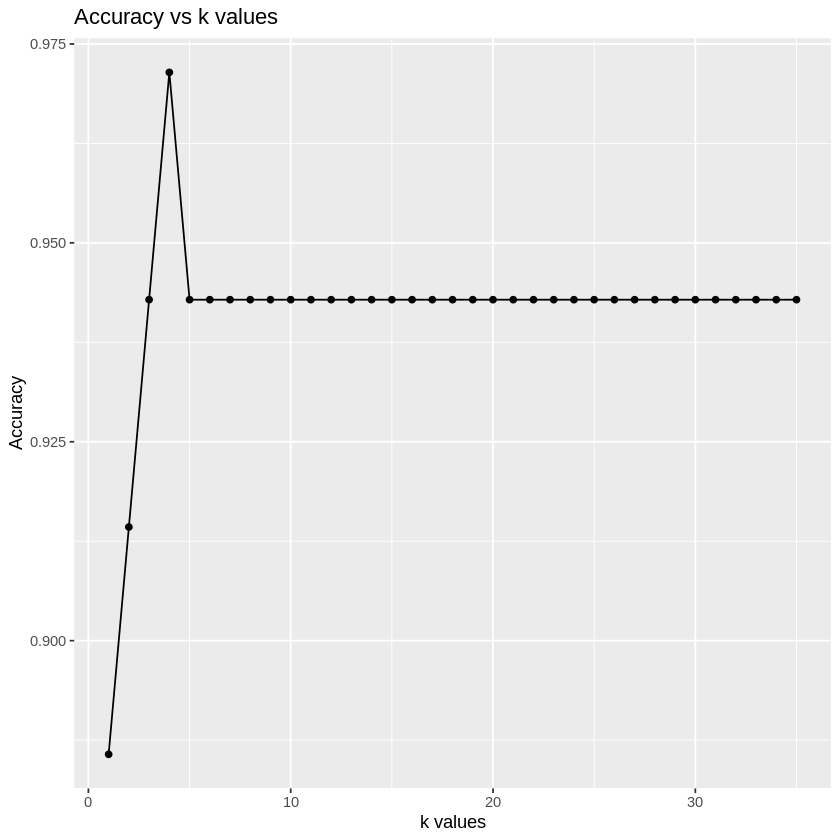

In [264]:
# Plot accuracy vs. k values
ggplot(data = accuracy.df, aes(x = k, y = accuracy)) +
  geom_point() +
  geom_line() +
  labs(x = "k values", y = "Accuracy") +
  ggtitle("Accuracy vs k values")

### Step - V: Optimal K Value

In [265]:
# Find the optimal k value
optimal_k <- accuracy.df$k[which.max(accuracy.df$accuracy)]
optimal_accuracy <- max(accuracy.df$accuracy)

# Print optimal k value and accuracy
cat("Optimal k value:", optimal_k, "\n")
cat("Optimal accuracy:", optimal_accuracy, "\n")


Optimal k value: 4 
Optimal accuracy: 0.9714286 


### Step - VI: Confusion Matrix

In [233]:
# Build confusion matrix
confusionMatrix(table(predicted = knnFit, actual = valid.data$Wifi))


Confusion Matrix and Statistics

         actual
predicted  0  1
        0  1  1
        1  1 32
                                         
               Accuracy : 0.9429         
                 95% CI : (0.8084, 0.993)
    No Information Rate : 0.9429         
    P-Value [Acc > NIR] : 0.6768         
                                         
                  Kappa : 0.4697         
                                         
 Mcnemar's Test P-Value : 1.0000         
                                         
            Sensitivity : 0.50000        
            Specificity : 0.96970        
         Pos Pred Value : 0.50000        
         Neg Pred Value : 0.96970        
             Prevalence : 0.05714        
         Detection Rate : 0.02857        
   Detection Prevalence : 0.05714        
      Balanced Accuracy : 0.73485        
                                         
       'Positive' Class : 0              
                                         

**💡Interpretation💡-**

- **Accuracy**: The overall accuracy of the model is 94.29%, indicating that it correctly predicted 94.29% of the instances in the validation set.
- **Sensitivity (True Positive Rate)**: The sensitivity, also known as the true positive rate, is 50%. This metric represents the proportion of actual positives (class 0, indicating presence of Wifi) that were correctly identified by the model.
- **Specificity (True Negative Rate)**: The specificity, or true negative rate, is 96.97%. This measures the proportion of actual negatives (class 1, indicating absence of Wifi) that were correctly identified by the model.
- **Positive Predictive Value (Precision)**: The positive predictive value, or precision, is 50%. This indicates the probability that instances predicted as having Wifi (class 0) actually have it.
- **Negative Predictive Value**: The negative predictive value is 96.97%, representing the probability that instances predicted as not having Wifi (class 1) actually don't have it.
- **Prevalence**: The prevalence of Wifi in the dataset is 5.71%, indicating the proportion of instances with Wifi.
- **Balanced Accuracy**: The balanced accuracy is 73.49%, calculated as the average of sensitivity and specificity. It provides a balanced assessment of the model's performance across both classes.

In summary, the model shows reasonably high accuracy and specificity but relatively low sensitivity, suggesting that it performs better at correctly identifying instances without Wifi than those with Wifi. This imbalance in performance could be due to the class distribution in the dataset or the model's inherent bias. Further tuning or exploration may be needed to improve sensitivity without compromising specificity.

### Solution : B

**💡Final Narative💡-**

In this analysis, the focus was on predicting the availability of Wifi as an amenity in rental listings in Zurich. The dataset contained information on various predictors such as the number of bathrooms, bedrooms, and the price of the listings. To prepare the data, I first created a binary variable for Wifi availability based on whether the term "wifi" was present in the amenities list. Then, I split the data into training and validation sets and normalized the numerical predictors. The kNN algorithm was chosen for its simplicity and effectiveness in handling classification tasks. To determine the optimal k-value, I utilized a loop to iterate through different values of k and evaluated the model's accuracy on the validation set for each k. The k-value that yielded the highest accuracy was selected as the optimal choice.

Upon evaluating the kNN model with the optimal k-value, it achieved an accuracy of 94.29% on the validation set, which suggests a good overall performance. However, a deeper analysis revealed that the model's sensitivity was relatively low at 50%, indicating a challenge in correctly identifying instances with Wifi. This imbalance in sensitivity and specificity might suggest potential areas for improvement in the model, such as exploring different feature selections or algorithmic approaches. Furthermore, comparing the model's performance against a naive Bayes algorithm, with the purpose of predicting the way consumers feel about the value that they recieve from the booking will help provide additional insights